In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [2]:
# Replace 'data.csv' with the actual path to your dataset
df = pd.read_csv('x.csv')

# Create an empty list to store the reshaped data
reshaped_data = []

# Iterate through each row in the original dataframe
for index, row in df.iterrows():
    subdivision = row['SUBDIVISION']
    year = row['YEAR']
    
    # Iterate through the columns representing months
    for month in df.columns[2:]:
        year_month = f"{year}-{month.zfill(2)}"
        rainfall = row[month]
        
        # Append the data in the desired format to the reshaped_data list
        reshaped_data.append([subdivision, year_month, rainfall])

# Create a new dataframe using the reshaped_data list
reshaped_df = pd.DataFrame(reshaped_data, columns=['SUBDIVISION', 'YEAR-MONTH', 'RAINFALL'])

# Print the reshaped dataframe
print(reshaped_df)

                     SUBDIVISION YEAR-MONTH  RAINFALL
0      ANDAMAN & NICOBAR ISLANDS   1901-JAN      49.2
1      ANDAMAN & NICOBAR ISLANDS   1901-FEB      87.1
2      ANDAMAN & NICOBAR ISLANDS   1901-MAR      29.2
3      ANDAMAN & NICOBAR ISLANDS   1901-APR       2.3
4      ANDAMAN & NICOBAR ISLANDS   1901-MAY     528.8
...                          ...        ...       ...
49387                LAKSHADWEEP   2015-AUG     146.4
49388                LAKSHADWEEP   2015-SEP     160.4
49389                LAKSHADWEEP   2015-OCT     165.4
49390                LAKSHADWEEP   2015-NOV     231.0
49391                LAKSHADWEEP   2015-DEC     159.0

[49392 rows x 3 columns]


In [3]:
# Remove rows with NaN values and zeros in the 'RAINFALL' column
reshaped_df_cleaned = reshaped_df.dropna(subset=['RAINFALL'])
reshaped_df_cleaned = reshaped_df_cleaned[reshaped_df_cleaned['RAINFALL'] != 0]

In [4]:
# Remove rows with NaN values and zeros in the 'RAINFALL' column
reshaped_df_cleaned = reshaped_df.dropna(subset=['RAINFALL'])
reshaped_df_cleaned = reshaped_df_cleaned[reshaped_df_cleaned['RAINFALL'] != 0]

# Convert 'YEAR-MONTH' to datetime
reshaped_df_cleaned['YEAR-MONTH'] = pd.to_datetime(reshaped_df_cleaned['YEAR-MONTH'], format='%Y-%b')

# Filter the data for the chosen subdivision (e.g., 'ANDAMAN & NICOBAR ISLANDS')
subdivision_data = reshaped_df_cleaned[reshaped_df_cleaned['SUBDIVISION'] == 'ANDAMAN & NICOBAR ISLANDS']

# Set 'YEAR-MONTH' as the index for time series analysis
subdivision_data.set_index('YEAR-MONTH', inplace=True)

# Sort the data based on the index (time series data should be sorted chronologically)
subdivision_data.sort_index(inplace=True)


rainfall_data = subdivision_data['RAINFALL']

In [5]:
rainfall_data.tail(10)

YEAR-MONTH
2015-03-01      3.1
2015-04-01    138.2
2015-05-01    331.9
2015-06-01    346.4
2015-07-01    328.9
2015-08-01    480.0
2015-09-01    523.3
2015-10-01    252.1
2015-11-01    236.3
2015-12-01    129.9
Name: RAINFALL, dtype: float64

<Axes: xlabel='YEAR-MONTH'>

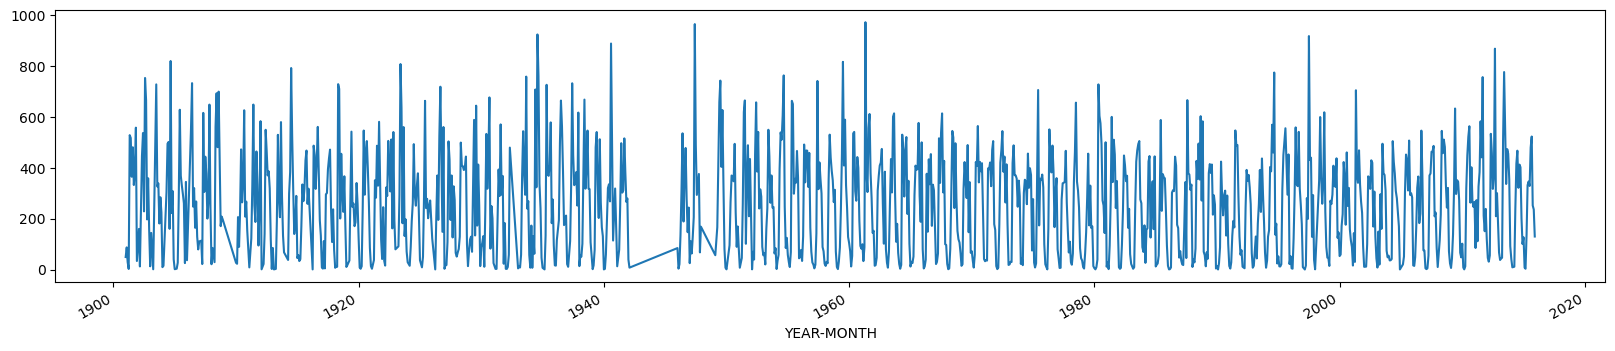

In [6]:
plt.figure(figsize=(20, 4)) 
rainfall_data.plot()

In [7]:
rainfall_data.dtypes

dtype('float64')

In [8]:
start_date = pd.to_datetime('1901-01-01')
end_date = pd.to_datetime('1950-12-31')

# Boolean indexing to remove the specified range
rainfall_data = rainfall_data[(rainfall_data.index < start_date) | (rainfall_data.index >= end_date)]

print(rainfall_data)

YEAR-MONTH
1951-01-01     82.7
1951-02-01      7.2
1951-04-01     45.4
1951-05-01    259.0
1951-06-01    619.9
              ...  
2015-08-01    480.0
2015-09-01    523.3
2015-10-01    252.1
2015-11-01    236.3
2015-12-01    129.9
Name: RAINFALL, Length: 767, dtype: float64


<Axes: xlabel='YEAR-MONTH'>

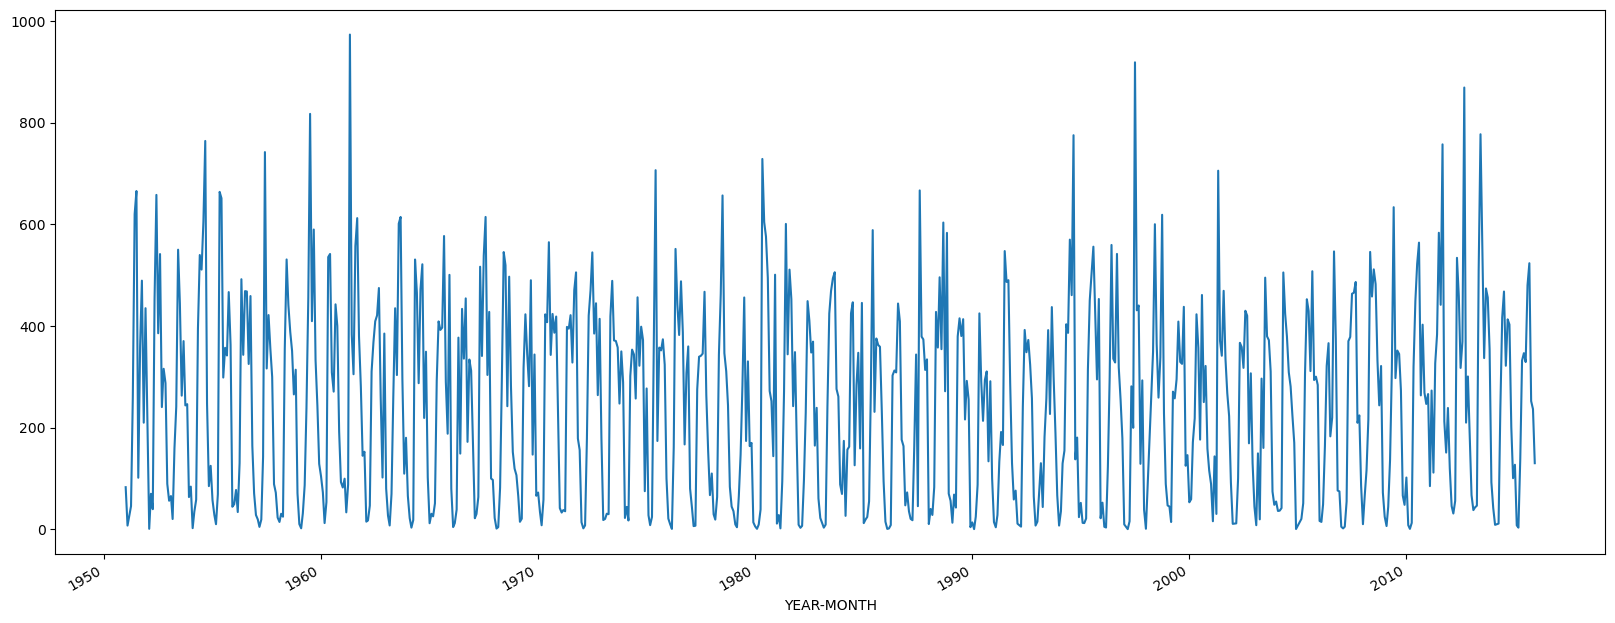

In [9]:
plt.figure(figsize=(20, 8)) 
rainfall_data.plot()

<Axes: xlabel='YEAR-MONTH'>

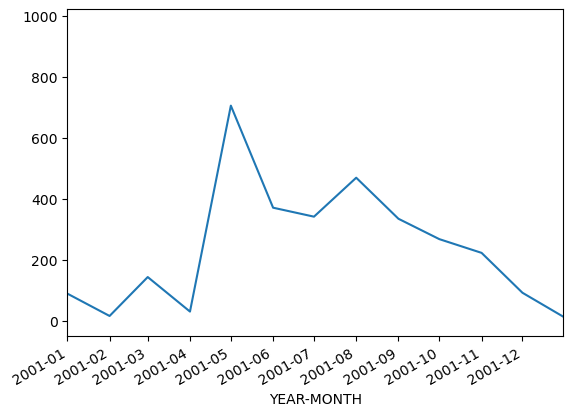

In [10]:
rainfall_data.plot(xlim=['2001-01-01','2001-12-31'])

<Axes: xlabel='YEAR-MONTH'>

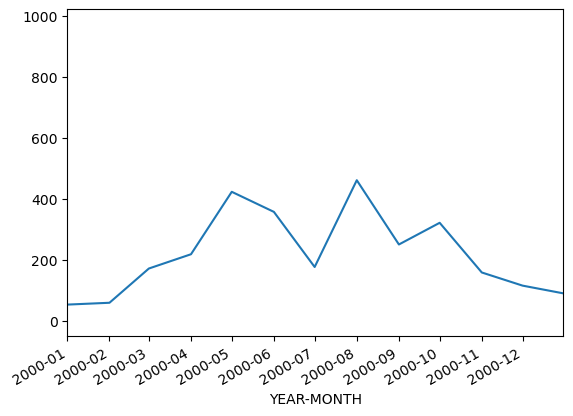

In [11]:
rainfall_data.plot(xlim=['2000-01-01','2000-12-31'])

In [12]:
rainfall_data.index

DatetimeIndex(['1951-01-01', '1951-02-01', '1951-04-01', '1951-05-01',
               '1951-06-01', '1951-07-01', '1951-08-01', '1951-09-01',
               '1951-10-01', '1951-11-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='YEAR-MONTH', length=767, freq=None)

In [13]:
## rule A year end frequency
rainfall_data_min_y = rainfall_data.resample(rule='A').min()
rainfall_data_min_y.head()

YEAR-MONTH
1951-12-31     7.2
1952-12-31     0.8
1953-12-31    20.1
1954-12-31     2.1
1955-12-31     9.9
Freq: A-DEC, Name: RAINFALL, dtype: float64

<Axes: xlabel='YEAR-MONTH'>

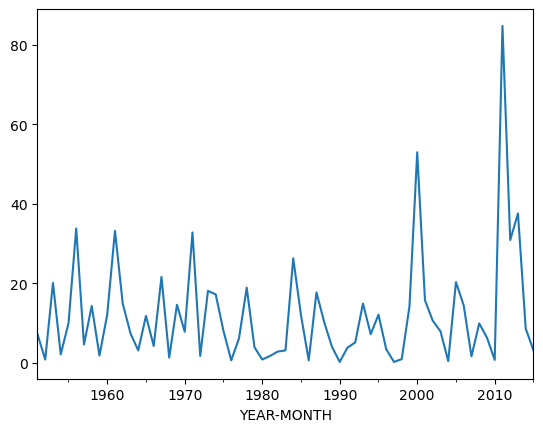

In [14]:
rainfall_data_min_y.plot()

In [15]:
## quartely start frequency
rainfall_data_min_q = rainfall_data.resample(rule='QS').min()
rainfall_data_min_q.head(5)

YEAR-MONTH
1951-01-01      7.2
1951-04-01     45.4
1951-07-01    101.3
1951-10-01    209.6
1952-01-01      0.8
Freq: QS-JAN, Name: RAINFALL, dtype: float64

<Axes: xlabel='YEAR-MONTH'>

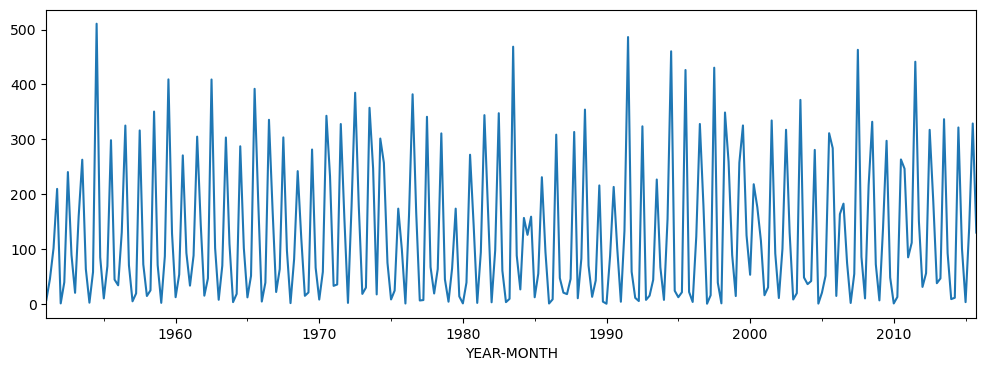

In [16]:
rainfall_data_min_q.plot(figsize=(12,4))

In [17]:
rainfall_data_max_y = rainfall_data.resample(rule='A').max()
rainfall_data_max_y.head()

YEAR-MONTH
1951-12-31    665.3
1952-12-31    657.7
1953-12-31    549.9
1954-12-31    763.8
1955-12-31    663.6
Freq: A-DEC, Name: RAINFALL, dtype: float64

<Axes: xlabel='YEAR-MONTH'>

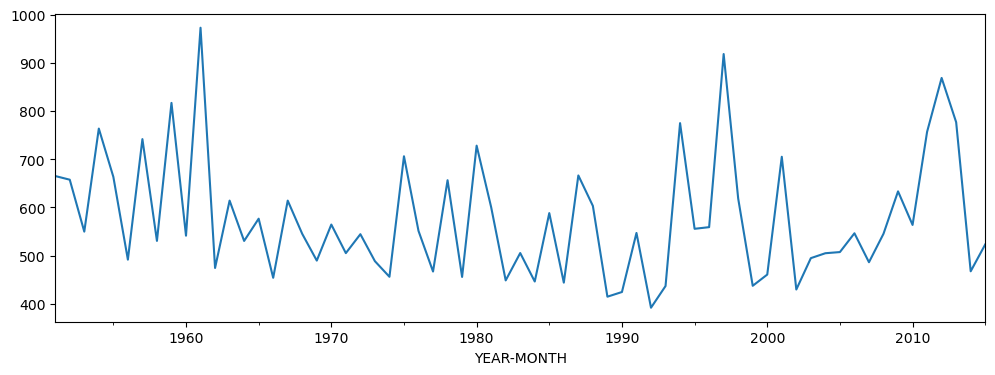

In [18]:
rainfall_data_max_y.plot(figsize=(12,4))

In [19]:
rainfall_data_max_q = rainfall_data.resample(rule='QS').max()
rainfall_data_max_q.head(5)

YEAR-MONTH
1951-01-01     82.7
1951-04-01    619.9
1951-07-01    665.3
1951-10-01    489.0
1952-01-01     69.7
Freq: QS-JAN, Name: RAINFALL, dtype: float64

<Axes: xlabel='YEAR-MONTH'>

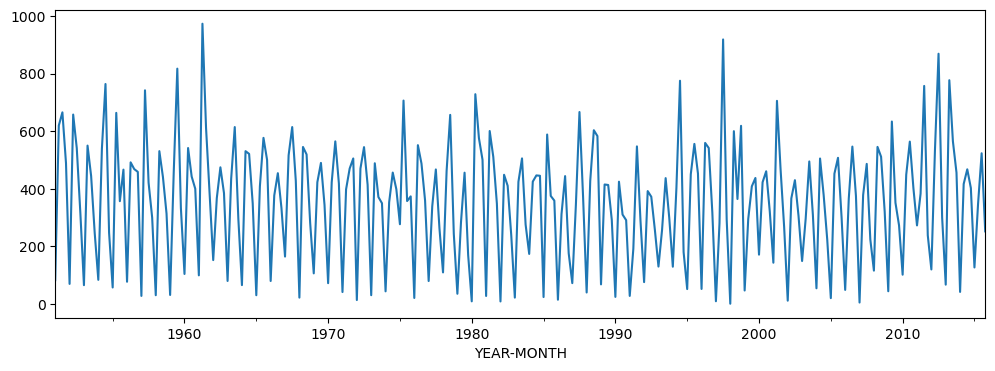

In [20]:
rainfall_data_max_q.plot(figsize=(12,4))

In [21]:
rainfall_data.resample(rule='A').mean()
rainfall_data.head(5)

YEAR-MONTH
1951-01-01     82.7
1951-02-01      7.2
1951-04-01     45.4
1951-05-01    259.0
1951-06-01    619.9
Name: RAINFALL, dtype: float64

<Axes: xlabel='YEAR-MONTH'>

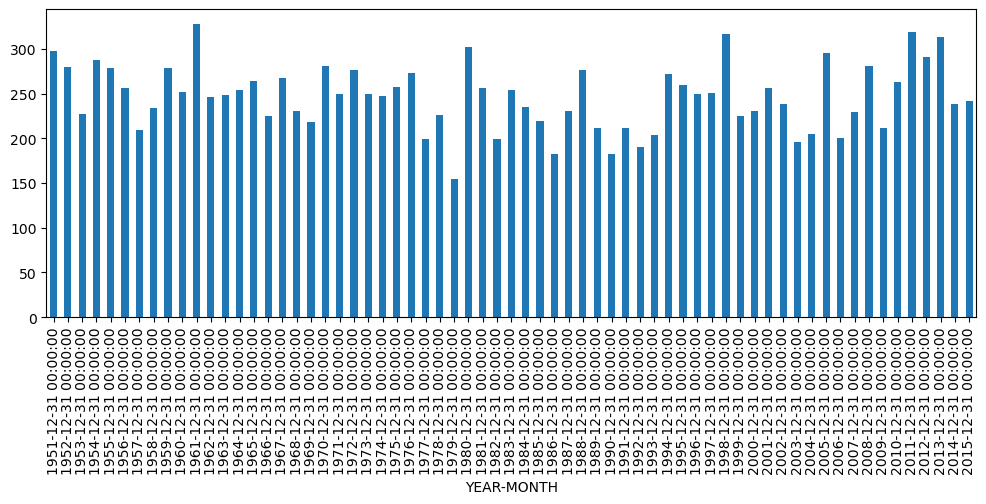

In [22]:
rainfall_data.resample(rule='A').mean().plot(kind='bar',figsize=(12,4))

In [23]:
rainfall_data_r = pd.DataFrame(rainfall_data)
rainfall_data_r['1YR R'] = rainfall_data_r['RAINFALL'].rolling(window=12,min_periods=1).mean()

In [24]:
rainfall_data_r.head()

,RAINFALL,1YR R
YEAR-MONTH,,
1951-01-01,82.7,82.700
1951-02-01,7.2,44.950
1951-04-01,45.4,45.100
1951-05-01,259.0,98.575
1951-06-01,619.9,202.840


<Axes: xlabel='YEAR-MONTH'>

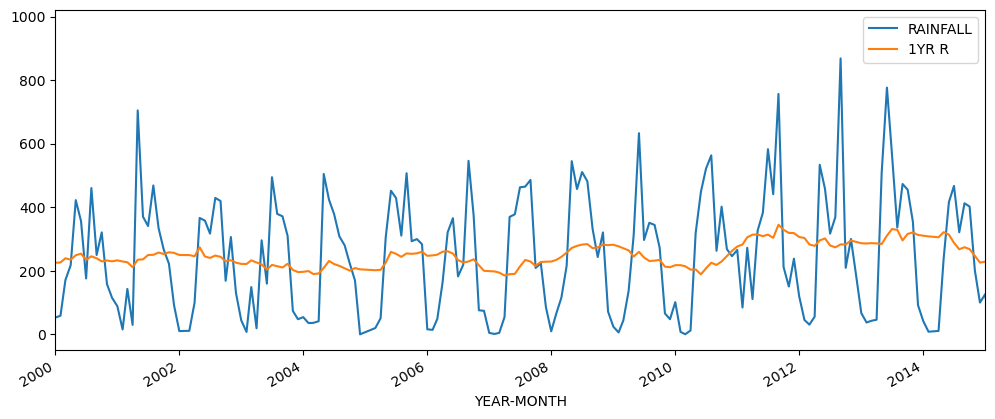

In [25]:
rainfall_data_r[['RAINFALL','1YR R']].plot(xlim=['2000-01-01','2015-01-01'],figsize=(12,5))

In [26]:
rainfall_data_cr = pd.DataFrame(rainfall_data)
rainfall_data_cr['1YR R'] = rainfall_data_cr['RAINFALL'].expanding().mean()

<Axes: xlabel='YEAR-MONTH'>

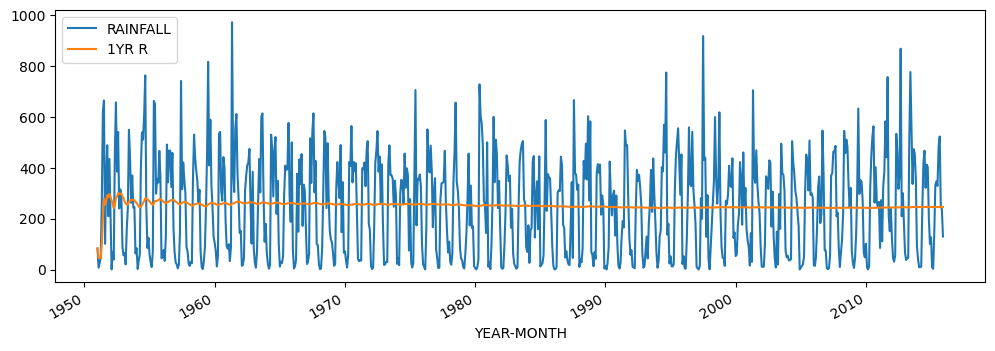

In [27]:
rainfall_data_cr.plot(figsize=(12,4))

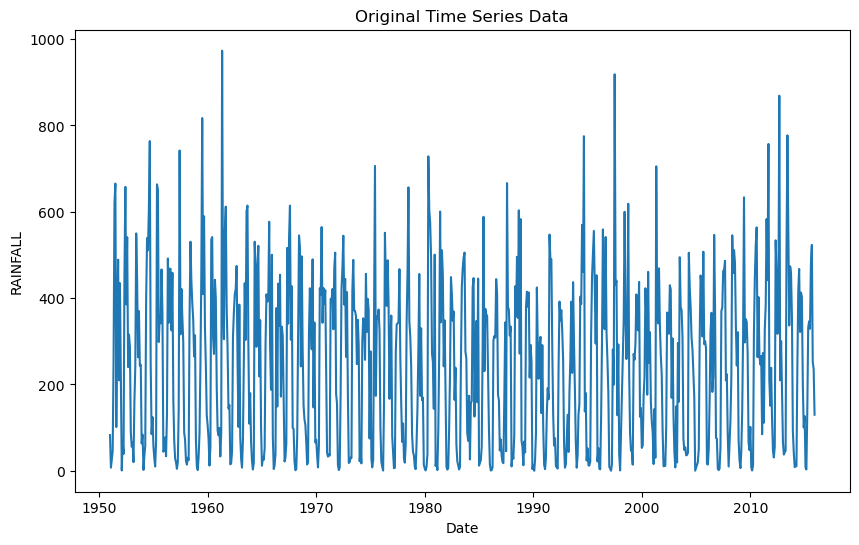

In [28]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

rainfall_data = pd.DataFrame(rainfall_data)
plt.figure(figsize=(10, 6))
plt.plot(rainfall_data['RAINFALL'])
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('RAINFALL')
plt.show()

In [29]:

# Perform Augmented Dickey-Fuller test
result = adfuller(rainfall_data['RAINFALL'])
print("ADF Test Results:")
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Check p-value against significance level (e.g., 0.05)
if result[1] <= 0.05:
    print("Reject the null hypothesis. Data is stationary.")
else:
    print("Fail to reject the null hypothesis. Data is non-stationary.")

ADF Test Results:
ADF Statistic: -5.927086069354404
p-value: 2.4293139761757374e-07
Critical Values:
   1%: -3.4390409569041207
   5%: -2.865375732701395
   10%: -2.568812543748081
Reject the null hypothesis. Data is stationary.


<Figure size 2000x1500 with 0 Axes>

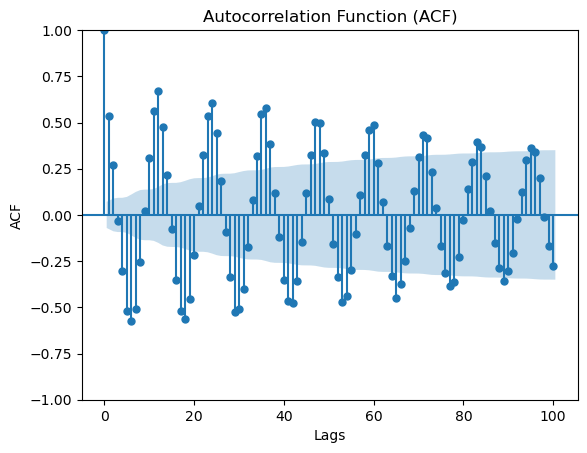

<Figure size 2000x1500 with 0 Axes>

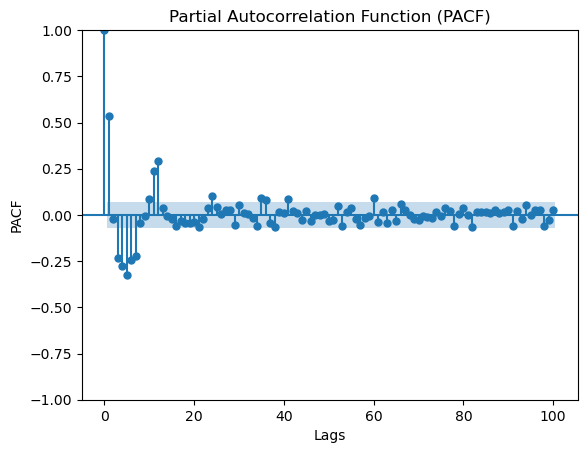

In [30]:
# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(20, 15))
plot_acf(rainfall_data, lags=100)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(20, 15))
plot_pacf(rainfall_data, lags=100)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [31]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2000,12,1)
test_dataset_end=datetime(2010,12,1)

In [32]:
train_data=rainfall_data[:train_dataset_end]
test_data=rainfall_data[train_dataset_end+timedelta(days=1):test_dataset_end]

In [33]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [34]:
test_data

,RAINFALL
YEAR-MONTH,
2001-01-01,89.0
2001-02-01,15.7
2001-03-01,143.3
2001-04-01,30.1
2001-05-01,705.3
...,...
2010-08-01,563.8
2010-09-01,263.3
2010-10-01,402.4


In [36]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# p=1,3,4,5,6,7,10,11,12  seasonal for sarimax = 6  ,q =10/54

model_ARIMA=ARIMA(rainfall_data['RAINFALL'],order=(1,0,12))
model_Arima_fit=model_ARIMA.fit()
model_Arima_fit.summary()

C:\Users\ayodh\anaconda3\envs\three-nine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ayodh\anaconda3\envs\three-nine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ayodh\anaconda3\envs\three-nine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ayodh\anaconda3\envs\three-nine\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameter

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               RAINFALL   No. Observations:                  767
Model:                ARIMA(1, 0, 12)   Log Likelihood               -4869.958
Date:                Wed, 13 Sep 2023   AIC                           9769.916
Time:                        08:53:48   BIC                           9839.554
Sample:                             0   HQIC                          9796.721
                                - 767                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        246.3405      7.981     30.866      0.000     230.698     261.983
ar.L1          0.4532      0.091      5.001      0.000       0.276       0.631
ma.L1         -0.1468      0.090     -1.631      0.103      -0.323       0.030
ma.L2          0.0298      0.040      0.736      0.462      -0.050       0.109
ma.L3         -0.0303      0.042     -0.730      0.465      -0.112       0.051
ma.L4         -0.0480      0.036     -1.324      0.186      -0.119       0.023
ma.L5         -0.1697      0.038     -4.477      0.000      -0.244      -0.095
ma.L6         -0.1384      0.035     -3.975      0.000      -0.207      -0.070
ma.L7         -0.1709      0.037     -4.577      0.000      -0.244      -0.098
ma.L8         -0.0378      0.038     -0.997      0.319      -0.112       0.037
ma.L9         -0.0376      0.036     -1.033      0.302      -0.109       0.034
ma.L10         0.0188      0.035      0.532      0.595      -0.051       0.088
ma.L11         0.1559      0.040      3.893      0.000       0.077       0.234
ma.L12         0.2876      0.038      7.551      0.000       0.213       0.362
sigma2      1.911e+04    938.603     20.363      0.000    1.73e+04     2.1e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               247.05
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             1.06
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2001-01-01 00:00:00
2010-12-01 00:00:00


In [38]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=rainfall_data['RAINFALL']-pred

In [39]:
pred

YEAR-MONTH
2001-01-01    140.555142
2001-02-01    179.757283
2001-03-01    146.887663
2001-04-01    228.843272
2001-05-01    230.591118
                 ...    
2010-08-01    404.147847
2010-09-01    440.943332
2010-10-01    280.325532
2010-11-01    240.934360
2010-12-01    192.665688
Name: predicted_mean, Length: 117, dtype: float64

In [40]:
residuals

YEAR-MONTH
1951-01-01   NaN
1951-02-01   NaN
1951-04-01   NaN
1951-05-01   NaN
1951-06-01   NaN
              ..
2015-08-01   NaN
2015-09-01   NaN
2015-10-01   NaN
2015-11-01   NaN
2015-12-01   NaN
Length: 767, dtype: float64

<Axes: ylabel='Density'>

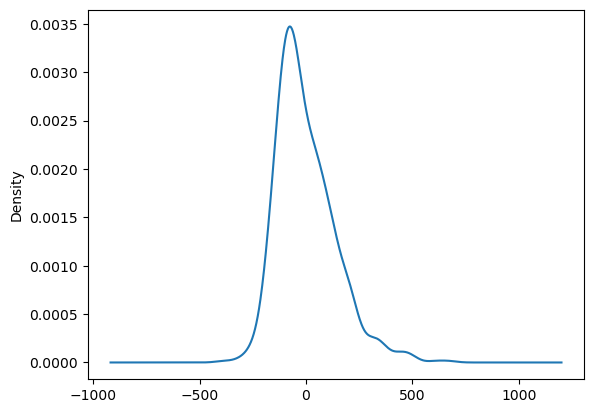

In [41]:
model_Arima_fit.resid.plot(kind='kde')

In [42]:
test_data['Predicted_ARIMA']=pred

C:\Users\ayodh\AppData\Local\Temp\ipykernel_27580\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='YEAR-MONTH'>

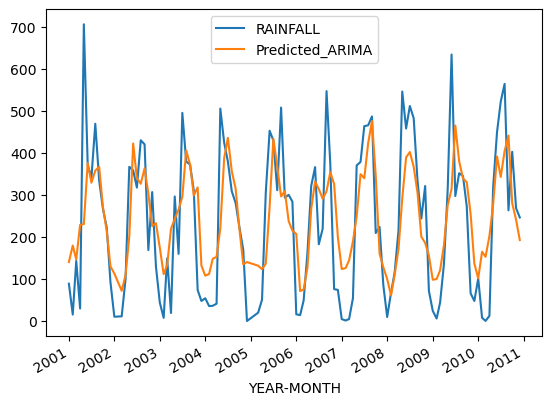

In [43]:
test_data[['RAINFALL','Predicted_ARIMA']].plot()